# Neural Network Implementation for the Iris Dataset using TensorFlow and Keras

## Preparing the Data

[INFO] loading data...


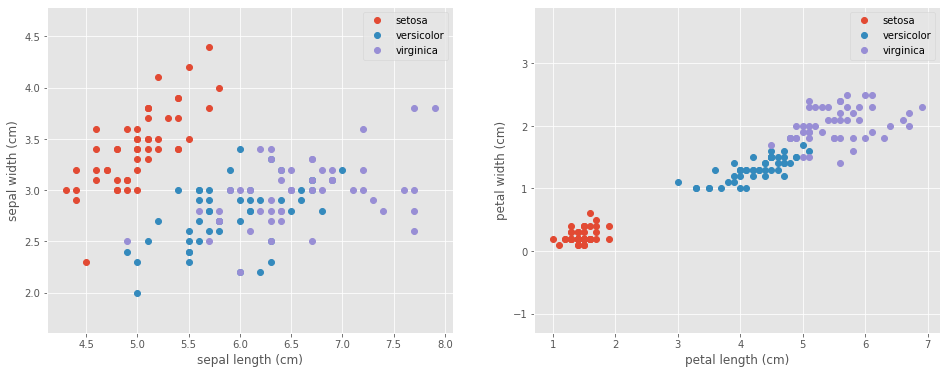

In [2]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# load the Iris dataset and perform a training and testing split,
# using 75% of the data for training and 25% for evaluation
print("[INFO] loading data...")
dataset = load_iris()

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
trainX, testX, trainY, testY = train_test_split(X_scaled, Y, test_size=0.25, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

## Training the model

In [12]:

# Encode the labels as 1-hot vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# Define the 4-3-3-3 architecture using Keras
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation="sigmoid"))
model.add(Dense(3, activation="sigmoid"))
model.add(Dense(3, activation="softmax"))

# Train the model using SGD
print("[INFO] training network...")
opt = SGD(lr=0.1, momentum=0.9, decay=0.1 / 250)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
model.fit(trainX, trainY, validation_data=(testX, testY),validation_split=0.33, epochs=30, verbose=False, batch_size=16)

#history2 = model2.fit(X, y, validation_split=0.33, epochs=30, callbacks= [early_stopping_monitor], verbose=False)

# Evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=16)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=dataset.target_names))

[INFO] training network...
[INFO] evaluating network...
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.64      0.78        11
   virginica       0.73      1.00      0.85        11

    accuracy                           0.89        38
   macro avg       0.91      0.88      0.87        38
weighted avg       0.92      0.89      0.89        38



## Visualizing ROC curve 

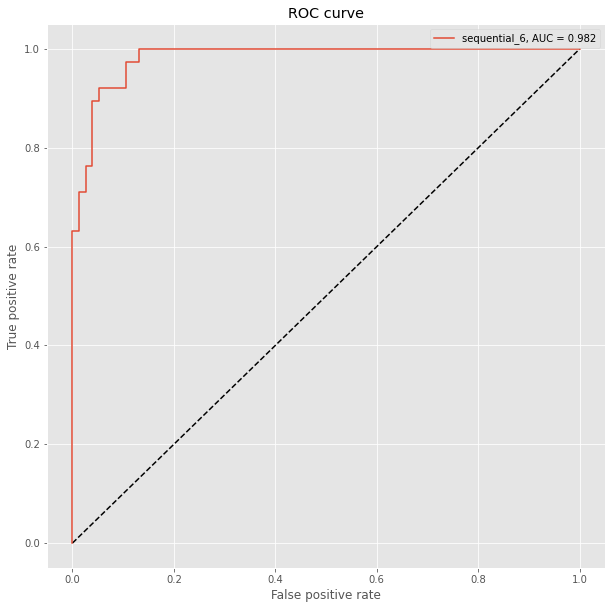

In [13]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')
    
fpr, tpr, threshold = roc_curve(testY.ravel(), predictions.ravel())
    
plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model.name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();